#### Pegunta Obligatoria (Pregunta 5).
A partir de un dataset de residuos sólidos, utilizar o generar un modelo preentrenado (de acuerdo a elección, el mismo no deberá ser inferior al año 2019, debe lograr conseguir un error menor al 15% y una precisión superior al 90% en clasificación de al menos 5 clases de residuos sólidos. Entrenar el modelo utilizando transfer learning y fine tunning de acuerdo al modelo asignado, analizar y explicar los resultados obtenidos.

####Descargando dataSet

In [1]:
%%capture
!pip install datasets transformers

In [2]:
%%capture
from datasets import load_dataset
ds = load_dataset("viola77data/recycling-dataset")

In [3]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 3107
    })
})

In [4]:
ex = ds["train"][650]
ex

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x474>,
 'label': 2}

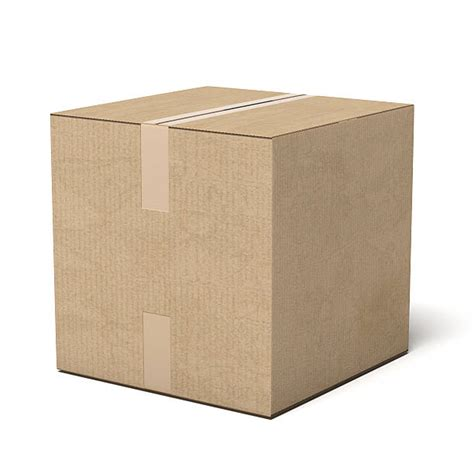

In [5]:
image =ex["image"]
image

### Creamos la etiquetas de nuestro DataSet


In [6]:
labels = ds["train"].features["label"]
labels

ClassLabel(names=['aluminium', 'batteries', 'cardboard', 'disposable plates', 'glass', 'hard plastic', 'paper', 'paper towel', 'polystyrene', 'soft plastics', 'takeaway cups'], id=None)

In [7]:
labels.int2str(ex["label"])

'cardboard'

### Cargamos el Feature Extractor

In [8]:
from transformers import ViTFeatureExtractor

repo_id ='microsoft/beit-base-patch16-224-pt22k-ft22k'
feature_extractor =ViTFeatureExtractor.from_pretrained(repo_id)

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [9]:
print(feature_extractor)

ViTFeatureExtractor {
  "crop_size": 224,
  "do_center_crop": false,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "feature_extractor_type": "BeitFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



In [10]:
feature_extractor(image, return_tensors="pt")

{'pixel_values': tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]])}

In [11]:
feature_extractor(image, return_tensors="pt")["pixel_values"].shape

torch.Size([1, 3, 224, 224])

### Procesando el dataSet

In [12]:
def transform(example_batch):
  inputs = feature_extractor([x for x in example_batch["image"]], return_tensors="pt")
  inputs['labels'] = example_batch["label"]
  return inputs


In [13]:
prepared_ds= ds.with_transform(transform)

In [15]:
prepared_ds["train"][0:2]

{'pixel_values': tensor([[[[ 0.8510,  0.8196,  0.8118,  ...,  0.8039,  0.8039,  0.8431],
          [ 0.8118,  0.7725,  0.7725,  ...,  0.7569,  0.7647,  0.8118],
          [ 0.8118,  0.7804,  0.7725,  ...,  0.7569,  0.7647,  0.7961],
          ...,
          [ 0.8118,  0.7882,  0.7882,  ...,  0.7412,  0.7412,  0.7725],
          [ 0.8118,  0.7961,  0.7882,  ...,  0.7412,  0.7569,  0.7882],
          [ 0.8196,  0.8275,  0.8118,  ...,  0.7725,  0.7961,  0.8039]],

         [[ 0.8824,  0.8510,  0.8431,  ...,  0.8353,  0.8353,  0.8745],
          [ 0.8431,  0.8039,  0.8039,  ...,  0.7882,  0.7961,  0.8431],
          [ 0.8431,  0.8118,  0.8039,  ...,  0.7882,  0.7961,  0.8275],
          ...,
          [ 0.8431,  0.8196,  0.8196,  ...,  0.7725,  0.7725,  0.8039],
          [ 0.8431,  0.8275,  0.8196,  ...,  0.7725,  0.7882,  0.8196],
          [ 0.8510,  0.8588,  0.8431,  ...,  0.8039,  0.8275,  0.8353]],

         [[ 0.9686,  0.9373,  0.9294,  ...,  0.9294,  0.9294,  0.9686],
          [ 0